In [146]:
import csv
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import pickle

table1 = pq.read_table('dnn_f1.parquet')
df_f1 = table1.to_pandas()
table2 = pq.read_table('dnn_acc.parquet')
df_acc = table2.to_pandas()

In [147]:
df_acc

,11,13,15
1000,"[0.9509, 0.9472, 0.9501, 0.9481]","[0.9528, 0.9508, 0.9504, 0.9516]","[0.9533, 0.9532, 0.9537, 0.9509]"
1250,"[0.9528, 0.9507, 0.9486, 0.949]","[0.9495, 0.9481, 0.9516, 0.9512]","[0.9501, 0.9516, 0.9521, 0.9516]"
1500,"[0.948, 0.9495, 0.9514, 0.9508]","[0.9519, 0.9508, 0.9506, 0.9516]","[0.9525, 0.9531, 0.9516, 0.9498]"


In [148]:
df_f1

,11,13,15
1000,"[0.9511, 0.9474, 0.9503, 0.9482]","[0.9531, 0.9512, 0.951, 0.9519]","[0.9535, 0.9533, 0.954, 0.9514]"
1250,"[0.9531, 0.9511, 0.9491, 0.9496]","[0.9496, 0.9484, 0.952, 0.9519]","[0.9504, 0.9517, 0.9524, 0.9518]"
1500,"[0.9483, 0.9498, 0.9516, 0.951]","[0.9523, 0.9511, 0.951, 0.9524]","[0.9528, 0.9536, 0.9517, 0.9499]"


In [149]:
layers = [1,2,3,4]
batches = [11,13,15]
for batch in batches:
    i=0
    for layer in layers:
        id_string  = str(batch) +"_" + str(layer)
        df_acc[id_string] = df_acc[batch].str[i]
        df_f1[id_string] = df_f1[batch].str[i]
        i = i+1

df_acc.drop(batches,axis=1, inplace=True)
df_f1.drop(batches,axis=1, inplace=True)

df_acc_1 = df_acc.filter(like='_1', axis=1)
df_acc_2 = df_acc.filter(like='_2', axis=1)
df_acc_3 = df_acc.filter(like='_3', axis=1)
df_acc_4 = df_acc.filter(like='_4', axis=1)
df_f1_1 = df_f1.filter(like='_1', axis=1)
df_f1_2 = df_f1.filter(like='_2', axis=1)
df_f1_3 = df_f1.filter(like='_3', axis=1)
df_f1_4 = df_f1.filter(like='_4', axis=1)

df_acc_11 = df_acc.filter(like='11_', axis=1)
df_acc_13 = df_acc.filter(like='13_', axis=1)
df_acc_15 = df_acc.filter(like='15_', axis=1)

df_acc

,11_1,11_2,11_3,11_4,13_1,13_2,13_3,13_4,15_1,15_2,15_3,15_4
1000,0.9509,0.9472,0.9501,0.9481,0.9528,0.9508,0.9504,0.9516,0.9533,0.9532,0.9537,0.9509
1250,0.9528,0.9507,0.9486,0.9490,0.9495,0.9481,0.9516,0.9512,0.9501,0.9516,0.9521,0.9516
1500,0.9480,0.9495,0.9514,0.9508,0.9519,0.9508,0.9506,0.9516,0.9525,0.9531,0.9516,0.9498


In [150]:
df_acc_1.reset_index(inplace=True)
df_acc_2.reset_index(inplace=True)
df_acc_3.reset_index(inplace=True)
df_acc_4.reset_index(inplace=True)

df_acc_11.reset_index(inplace=True)
df_acc_13.reset_index(inplace=True)
df_acc_15.reset_index(inplace=True)

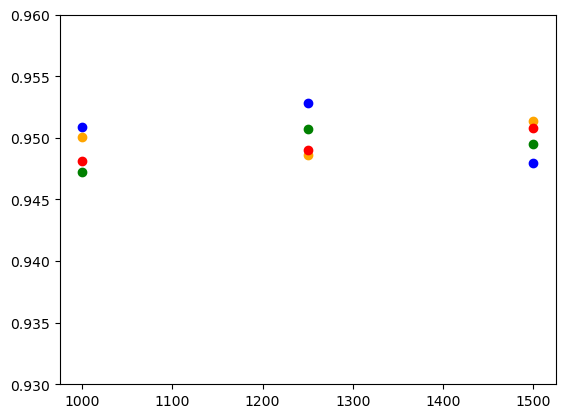

In [151]:
fig, ax = plt.subplots()
plt.ylim(0.930,0.960)
ax.scatter(df_acc_11['index'], df_acc_11['11_1'], label='1', color='blue')
ax.scatter(df_acc_11['index'], df_acc_11['11_2'], label='2', color='green')
ax.scatter(df_acc_11['index'], df_acc_11['11_3'], label='3', color='orange')
ax.scatter(df_acc_11['index'], df_acc_11['11_4'], label='4', color='red')
plt.show()

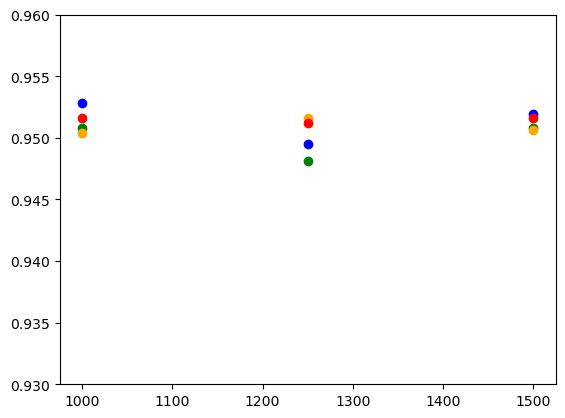

In [152]:
fig, ax = plt.subplots()
plt.ylim(0.930,0.960)
ax.scatter(df_acc_13['index'], df_acc_13['13_1'], label='1', color='blue')
ax.scatter(df_acc_13['index'], df_acc_13['13_2'], label='2', color='green')
ax.scatter(df_acc_13['index'], df_acc_13['13_3'], label='3', color='orange')
ax.scatter(df_acc_13['index'], df_acc_13['13_4'], label='4', color='red')
plt.show()

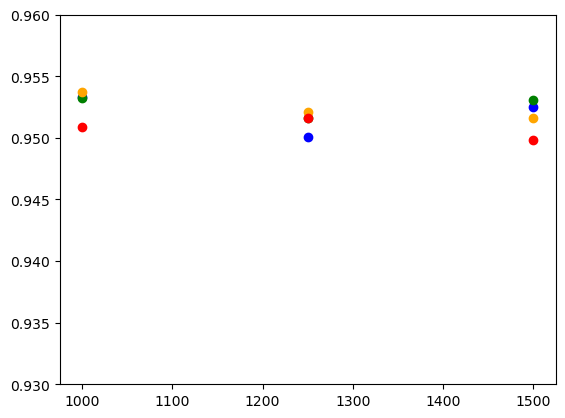

In [153]:
fig, ax = plt.subplots()
plt.ylim(0.930,0.960)
ax.scatter(df_acc_15['index'], df_acc_15['15_1'], label='1', color='blue')
ax.scatter(df_acc_15['index'], df_acc_15['15_2'], label='2', color='green')
ax.scatter(df_acc_15['index'], df_acc_15['15_3'], label='3', color='orange')
ax.scatter(df_acc_15['index'], df_acc_15['15_4'], label='4', color='red')
plt.show()

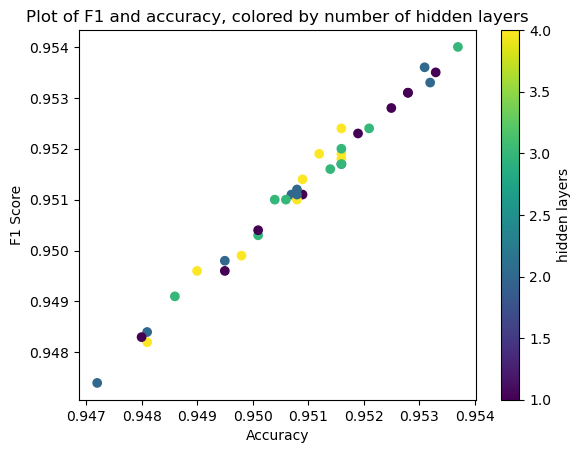

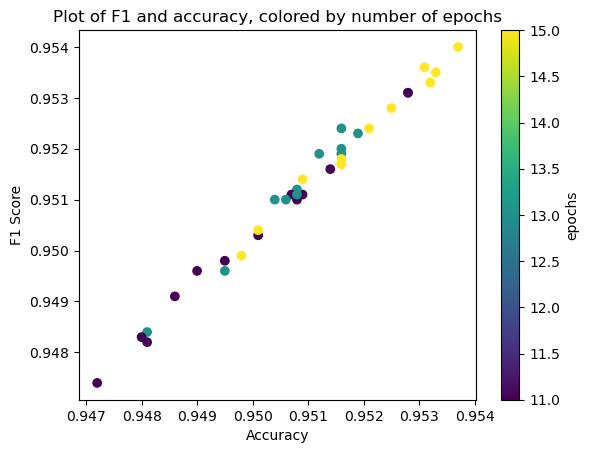

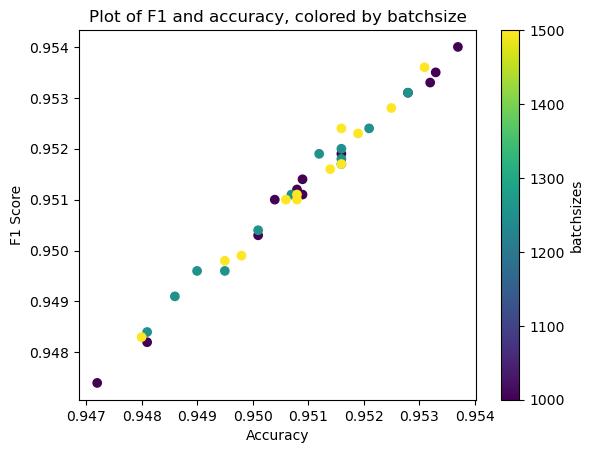

In [222]:
combine = df_acc.stack().reset_index().rename(columns={'level_0': 'batchsize', 'level_1': 'e_l',0: 'acc'})
combine['id'] = combine['batchsize'].astype(str) + "_" + combine['e_l'].astype(str)
combine2 = df_f1.stack().reset_index().rename(columns={'level_0': 'batchsize', 'level_1': 'e_l',0: 'f1'})
combine2['id'] = combine2['batchsize'].astype(str) + "_" + combine2['e_l'].astype(str)

combine = combine.drop(columns=['batchsize','e_l'])
combine2 = combine2.drop(columns=['batchsize','e_l'])

tbl = pd.merge(combine, combine2, on='id')

tbl['batchsize']=tbl['id'].str[:4]
tbl['epochs']=tbl['id'].str[5:7]
tbl['layers']=tbl['id'].str[8:9]
tbl.drop(columns=['id'], inplace=True)

#color_map = {1: 'blue', 2: 'green', 3 : 'orange', 4 : 'red'}
#tbl['color'] = tbl['layers'].map(color_map)


plt.scatter(x=tbl['acc'],y=tbl['f1'],c=[tbl['layers']], cmap='viridis')
plt.xlabel('Accuracy')
plt.ylabel('F1 Score')
plt.title('Plot of F1 and accuracy, colored by number of hidden layers')
plt.colorbar(label='hidden layers')
plt.savefig('by_layers.png')
plt.show()

plt.scatter(x=tbl['acc'],y=tbl['f1'],c=[tbl['epochs']], cmap='viridis')
plt.xlabel('Accuracy')
plt.ylabel('F1 Score')
plt.title('Plot of F1 and accuracy, colored by number of epochs')
plt.colorbar(label='epochs')
plt.savefig('by_epochs.png')
plt.show()

plt.scatter(x=tbl['acc'],y=tbl['f1'],c=[tbl['batchsize']], cmap='viridis')
plt.xlabel('Accuracy')
plt.ylabel('F1 Score')
plt.title('Plot of F1 and accuracy, colored by batchsize')
plt.colorbar(label='batchsizes')
plt.savefig('by_batchsizes.png')
plt.show()
